Adınız:  Umutcan

Soyadınız:  Kemahlı

Okul Numaranız:  2212721050

GitHub Repo Bağlantısı: https://github.com/umutckem/CNN_siniflandirma.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/train"
val_dir   = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/val"
test_dir  = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/test"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32

gen = ImageDataGenerator(rescale=1/255)

train_data = gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 90 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


Bu bölümde, performans karşılaştırması yapmak amacıyla
sıfırdan oluşturulmuş bir CNN modeli eğitilmiştir.
Model, üç adet konvolüsyon ve max-pooling bloğundan oluşmaktadır.


In [ ]:
# =======================
# SIFIRDAN OLUŞTURULMUŞ CNN MODELİ (BASELINE MODEL)
# =======================

# Gerekli Keras bileşenleri içe aktarılır
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Sıralı (Sequential) model tanımlanır
model2 = Sequential()


# -----------------------
# 1. CONVOLUTION BLOĞU
# -----------------------

# 16 filtreli konvolüsyon katmanı
# input_shape ile giriş görüntü boyutu belirtilir
model2.add(Conv2D(
    16, (3,3),
    activation='relu',
    padding='same',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
))

# Özellik haritalarının boyutunu yarıya düşürmek için max-pooling
model2.add(MaxPooling2D(2,2))


# -----------------------
# 2. CONVOLUTION BLOĞU
# -----------------------

# 32 filtreli konvolüsyon katmanı
# Daha karmaşık özelliklerin öğrenilmesi hedeflenir
model2.add(Conv2D(32, (3,3), activation='relu', padding='same'))

# Boyut küçültme
model2.add(MaxPooling2D(2,2))


# -----------------------
# 3. CONVOLUTION BLOĞU
# -----------------------

# 64 filtreli konvolüsyon katmanı
# Yüksek seviyeli görsel özellikler çıkarılır
model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))

# Boyut küçültme
model2.add(MaxPooling2D(2,2))


# -----------------------
# REGULARIZATION + FLATTEN
# -----------------------

# Aşırı öğrenmeyi (overfitting) azaltmak için dropout
model2.add(Dropout(0.3))

# 2D özellik haritaları 1D vektöre dönüştürülür
model2.add(Flatten())


# -----------------------
# TAM BAĞLANTILI KATMANLAR
# -----------------------

# Özelliklerin birleştirildiği tam bağlantılı katman
model2.add(Dense(256, activation='relu'))

# Overfitting'i azaltmak için dropout
model2.add(Dropout(0.4))


# -----------------------
# ÇIKIŞ KATMANI
# -----------------------

# İkili sınıflandırma için tek nöronlu sigmoid çıkış
model2.add(Dense(1, activation='sigmoid'))  # binary output


In [ ]:
# =======================
# BASELINE CNN MODELİNİN DERLENMESİ
# =======================

# Sıfırdan oluşturulan CNN modeli derlenir
# Adam optimizasyon algoritması kullanılır
# Öğrenme oranı (1e-4), stabil ve kontrollü bir eğitim sağlar
model2.compile(
    optimizer=Adam(1e-4),          # Optimizasyon algoritması
    loss="binary_crossentropy",    # İkili sınıflandırma için kayıp fonksiyonu
    metrics=["accuracy"]           # Performans metriği
)


# =======================
# MODEL ÖZETİ
# =======================

# Model mimarisi, katmanlar ve parametre sayıları ekrana yazdırılır
# Bu çıktı, modelin karmaşıklığını ve yapısını analiz etmek için kullanılır
model2.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,401 (16.09 MB)

 Trainable params: 4,218,401 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5068 - loss: 0.7002 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4712 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6808
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5664 - loss: 0.6806 - val_accuracy: 0.5000 - val_loss: 0.6771
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5960 - loss: 0.6674 - val_accuracy: 0.5000 - val_loss: 0.6720
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6214 - loss: 0.6571 - val_accuracy: 0.9500 - val_loss: 0.6645
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6731 - loss: 0.6655 - val_accuracy: 0.5000 - val_loss: 0.6616
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6497 - loss: 0.6487 - val_accuracy: 0.9500 - val_loss: 0.6478
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5432 - loss: 0.6691 - val_accuracy: 0.6500 - val_loss: 0.6376
Epoch 9/10
3/

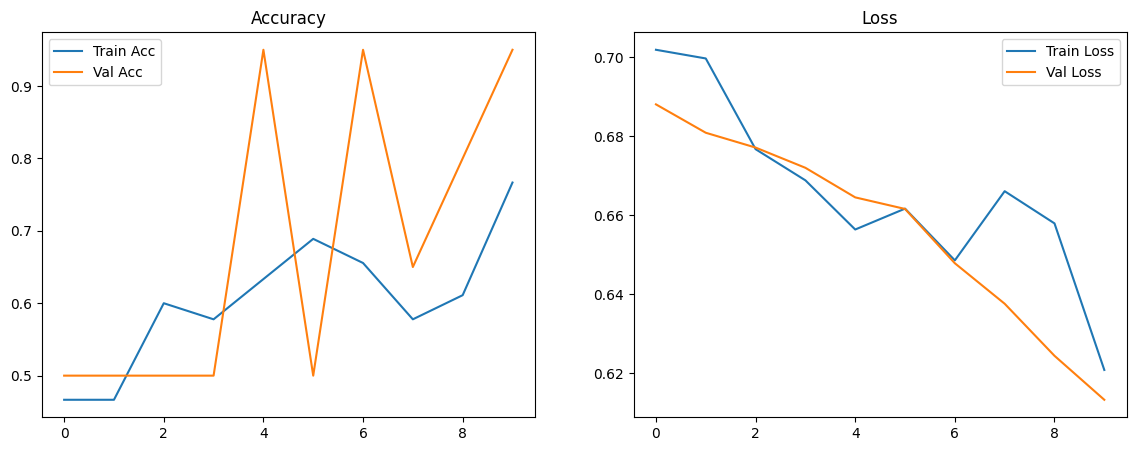

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"], label="Train Acc")
plt.plot(history2.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history2.history["loss"], label="Train Loss")
plt.plot(history2.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [ ]:
test_loss, test_acc = model2.evaluate(test_data)
print("Model-2 Test Accuracy:", test_acc)

pred2 = (model2.predict(test_data) > 0.5).astype("int32")
true2 = test_data.classes

print("Pred:", pred2.reshape(-1))
print("True:", true2)
print("Manual Accuracy:", (pred2.reshape(-1) == true2).mean())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7222 - loss: 0.6402
Model-2 Test Accuracy: 0.7222222089767456
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Pred: [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1]
True: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Manual Accuracy: 0.7222222222222222


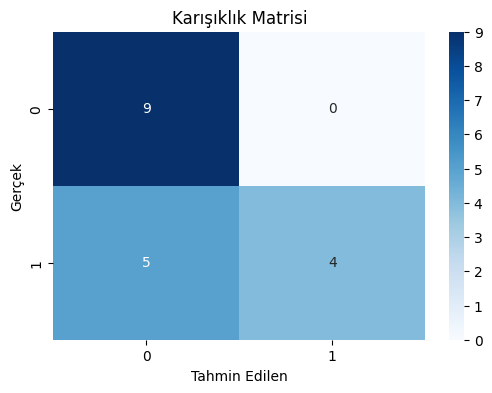

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerçek ve tahmin değerleri
y_true = true2
y_pred = pred2.reshape(-1)

# Karışıklık matrisi
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()
